In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
base_dir = os.path.abspath('../')
file_path = os.path.join(base_dir, 'data', 'raw', 'data.csv')
data = pd.read_csv(file_path)
df = data.copy()

## 1 Dataset Overview

In [5]:
print("Dataset Overview")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("\nColumn Data Types:")
print(data.dtypes)
print("\nFirst 5 rows:")
print(data.head())
print("\nLast 5 rows:")
print(data.tail())

Dataset Overview
Number of rows: 95662
Number of columns: 16

Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  Subscr

In [6]:
# Convert TransactionStartTime to datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')


# Check for any remaining inconsistencies after conversion
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

(None,
          TransactionId         BatchId       AccountId       SubscriptionId  \
 0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
 1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
 2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
 3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
 4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   
 
         CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
 0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
 1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
 2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
 3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
 4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   
 
       ProductCategory    ChannelId   Amount  V

# 2. Summary Statistics

In [9]:
print("\nSummary Statistics:")
print(df.describe().T)


Summary Statistics:
                   count         mean            std        min    25%  \
CountryCode      95662.0   256.000000       0.000000      256.0  256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max  
CountryCode       256.0   256.0      256.0  
Amount           1000.0  2800.0  9880000.0  
Value            1000.0  5000.0  9880000.0  
PricingStrategy     2.0     2.0        4.0  
FraudResult         0.0     0.0        1.0  


# 3. Distribution of Numerical Features

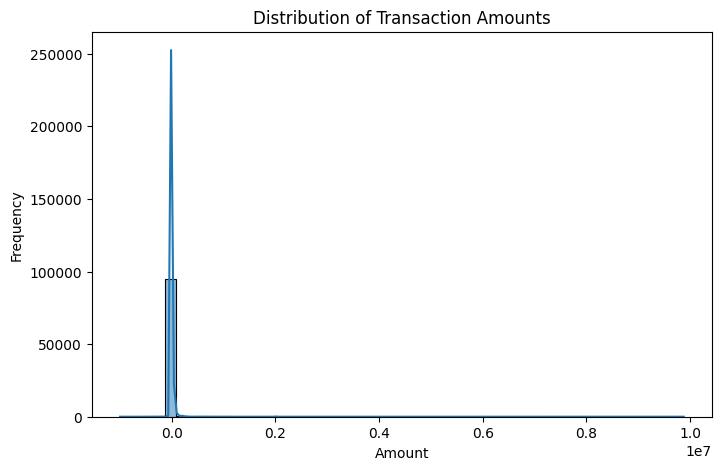

In [10]:
# Distribution of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

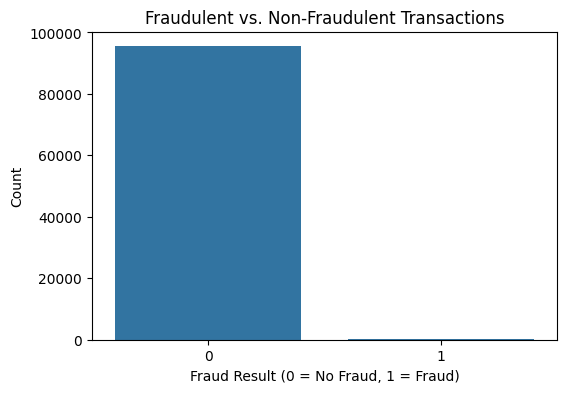

In [14]:
# Fraud Result Count
plt.figure(figsize=(6,4))
sns.countplot(x=df['FraudResult'])
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud Result (0 = No Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

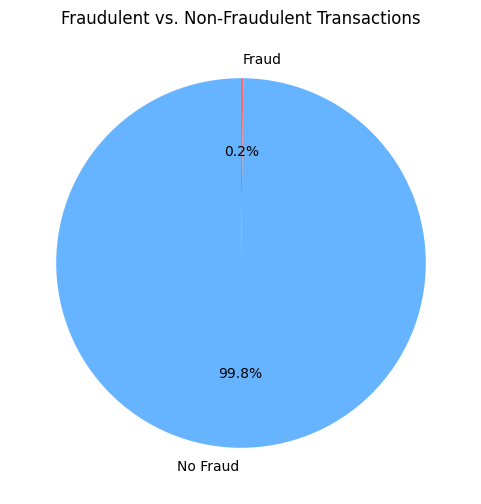

In [15]:
# Fraud Result Count using Pie Chart
fraud_counts = df['FraudResult'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

# 4. Distribution of Categorical Features

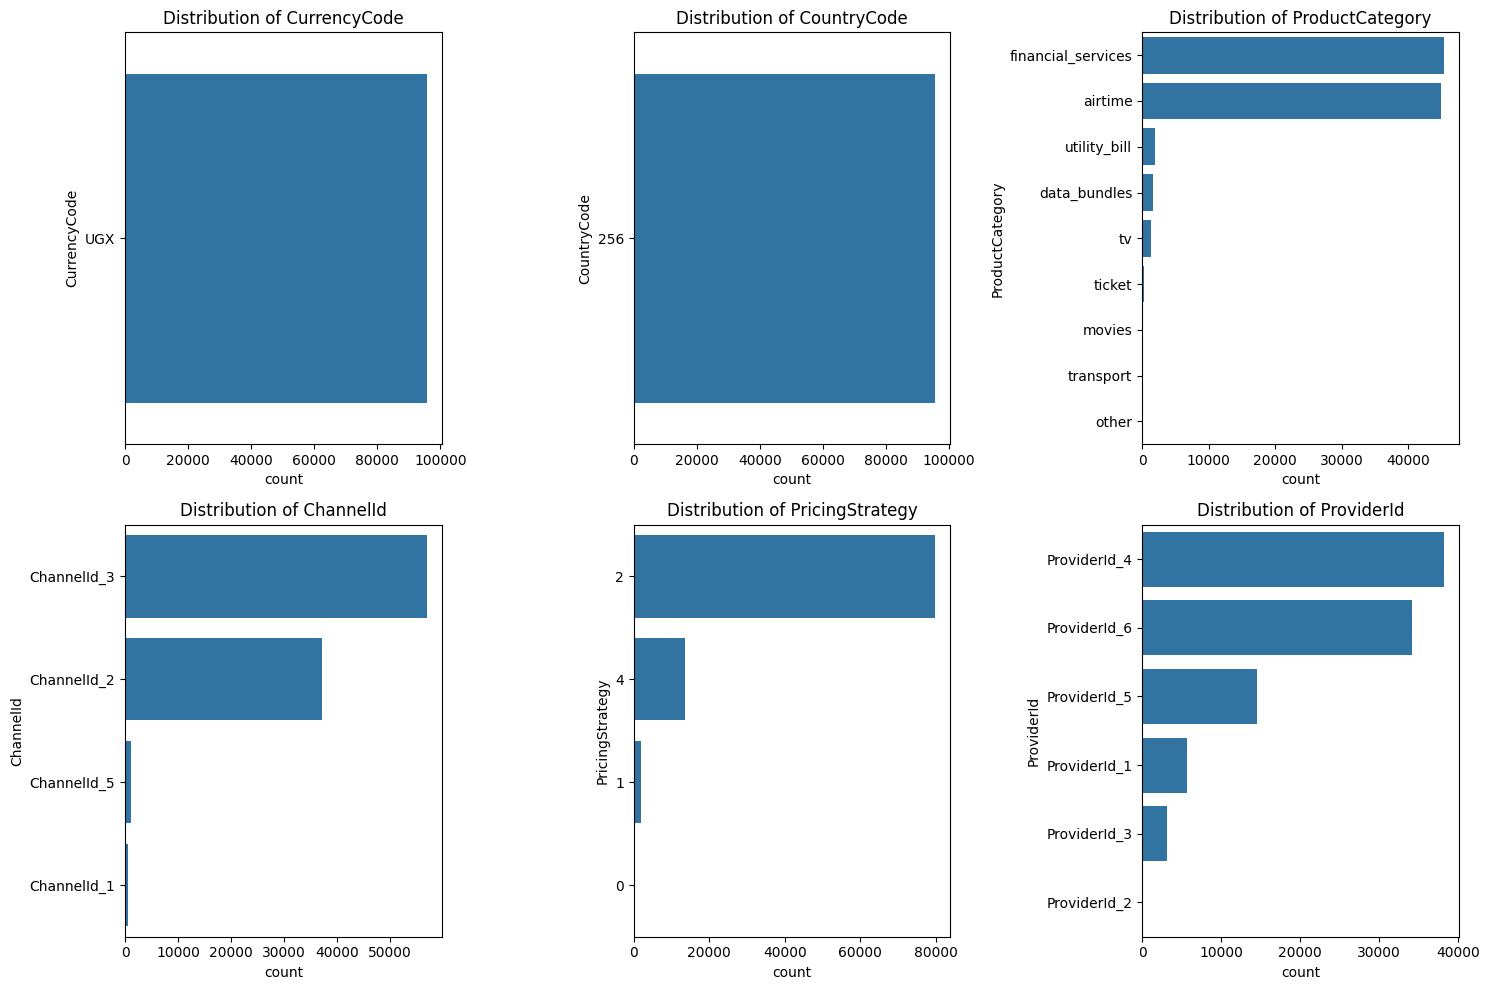

In [17]:
# Distribution of Categorical Features
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'ProviderId']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

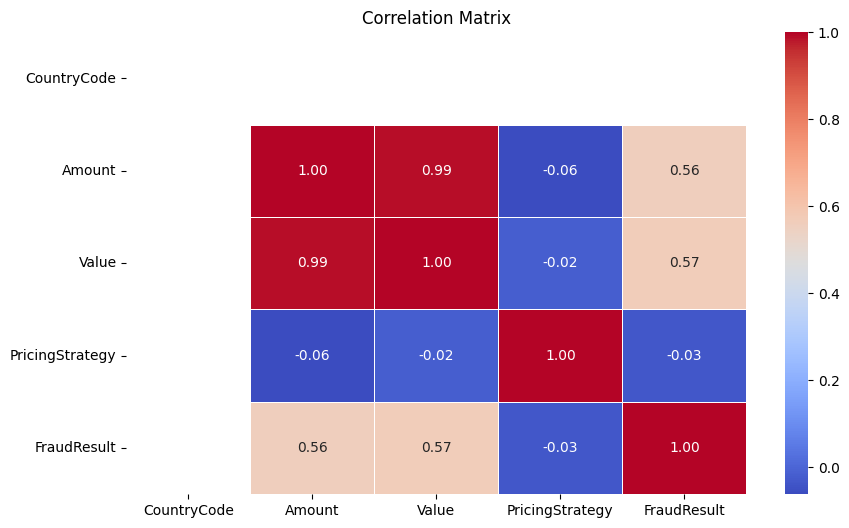

In [21]:
# Correlation Matrix
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


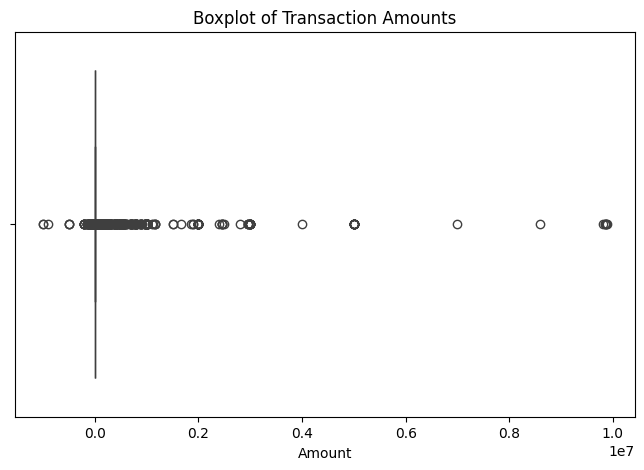

In [19]:
# Outlier Detection using Boxplots
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()


In [20]:
# Identifying Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [22]:
# Define the path where you want to save the cleaned dataframe
cleaned_file_path = os.path.join(base_dir, 'data', 'processed', 'cleaned_data.csv')

# Save the dataframe to a CSV file
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataframe saved to {cleaned_file_path}")

Cleaned dataframe saved to c:\Users\smrc\Documents\GitHub\Credit-Scoring-Model\data\processed\cleaned_data.csv
